In [45]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset from a CSV file into a pandas DataFrame
df = pd.read_csv('Churn_Modelling.csv')
df.head()

# Convert True/False to 1/0 if any boolean columns exist (unlikely in this dataset, but included for generality)
df = df.applymap(lambda x: 1 if x is True else (0 if x is False else x))

C:\Users\Saksham Maggu\AppData\Local\Temp\ipykernel_3828\3033051976.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: 1 if x is True else (0 if x is False else x))


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
# Check for duplicate rows in the dataset and return the total number of duplicates
df.duplicated().sum()

0

In [49]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [50]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [51]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [ ]:
df.drop(columns = ['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True) 

In [53]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df = pd.get_dummies(df, columns = ['Geography', 'Gender'], drop_first=True)

In [55]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


In [56]:
x = df.drop(columns = ['Exited'])
y = df['Exited']

In [57]:
print(x, y)

      CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0             619   42       2       0.00              1          1   
1             608   41       1   83807.86              1          0   
2             502   42       8  159660.80              3          1   
3             699   39       1       0.00              2          0   
4             850   43       2  125510.82              1          1   
...           ...  ...     ...        ...            ...        ...   
9995          771   39       5       0.00              2          1   
9996          516   35      10   57369.61              1          1   
9997          709   36       7       0.00              1          0   
9998          772   42       3   75075.31              2          1   
9999          792   28       4  130142.79              1          1   

      IsActiveMember  EstimatedSalary  Geography_Germany  Geography_Spain  \
0                  1        101348.88              False            Fa

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data: 80% for training, 20% for testing, with a fixed random seed for reproducibility
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

print("x_train: ", x_train)
print("x_test: ", x_test)
print("y_train: ", y_train)
print("y_test: ", y_test)

x_train:        CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
2694          628   29       3  113146.98              2          0   
5140          626   29       4  105767.28              2          0   
2568          612   47       6  130024.87              1          1   
3671          646   52       6  111739.40              2          0   
7427          714   33       8  122017.19              1          0   
...           ...  ...     ...        ...            ...        ...   
2895          621   47       7  107363.29              1          1   
7813          684   63       3   81245.79              1          1   
905           672   45       9       0.00              1          1   
5192          663   39       8       0.00              2          1   
235           763   42       6  100160.75              1          1   

      IsActiveMember  EstimatedSalary  Geography_Germany  Geography_Spain  \
2694               1        124749.08               True    

In [59]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

print("x_train_scaled: ", x_train_scaled)
print("x_test_scaled: ", x_test_scaled)

x_train_scaled:  [[-0.23082038 -0.94449979 -0.70174202 ...  1.71490137 -0.57273139
   0.91509065]
 [-0.25150912 -0.94449979 -0.35520275 ... -0.58312392 -0.57273139
  -1.09278791]
 [-0.3963303   0.77498705  0.33787579 ...  1.71490137 -0.57273139
  -1.09278791]
 ...
 [ 0.22433188  0.58393295  1.3774936  ... -0.58312392 -0.57273139
  -1.09278791]
 [ 0.13123255  0.01077067  1.03095433 ... -0.58312392 -0.57273139
  -1.09278791]
 [ 1.1656695   0.29735181  0.33787579 ...  1.71490137 -0.57273139
   0.91509065]]
x_test_scaled:  [[-1.03768121  0.77498705 -1.0482813  ... -0.58312392 -0.57273139
   0.91509065]
 [ 0.30708683 -0.46686456 -0.70174202 ... -0.58312392 -0.57273139
   0.91509065]
 [-1.23422423  0.29735181 -1.0482813  ... -0.58312392 -0.57273139
  -1.09278791]
 ...
 [-0.86182692 -0.46686456  1.72403288 ... -0.58312392  1.74601919
   0.91509065]
 [-0.30323097 -0.84897275 -1.0482813  ...  1.71490137 -0.57273139
  -1.09278791]
 [ 0.04847759  1.25262228  1.3774936  ...  1.71490137 -0.57273139

In [60]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# Initialize a sequential neural network model (layers are added sequentially)
model = Sequential()

# Add the first hidden layer:
# - 11 neurons (arbitrary choice), ReLU activation (introduces non-linearity), input_dim=11 (expected number of features)
model.add(Dense(11, activation = 'relu', input_dim = 11))

# Add the second hidden layer:
# - 11 neurons, ReLU activation (no need to specify input_dim since it’s inferred from the previous layer)
model.add(Dense(11, activation = 'relu'))

# Add the output layer:
# - 1 neuron (binary classification: churn or not), sigmoid activation (outputs probability between 0 and 1)
model.add(Dense(1, activation = 'sigmoid'))

e:\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [73]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the model:
# - Loss function: binary_crossentropy (suitable for binary classification)
# - Optimizer: adam (adaptive learning rate optimizer)
# - Metrics: accuracy (to track during training)
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
# Train the model:
# - Use scaled training data, 100 epochs (iterations over the dataset)
# - validation_split=0.2 reserves 20% of training data for validation to monitor overfitting
history = model.fit(x_train_scaled, y_train, epochs = 100, validation_split = 0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8637 - loss: 0.3220 - val_accuracy: 0.8531 - val_loss: 0.3483
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8664 - loss: 0.3165 - val_accuracy: 0.8525 - val_loss: 0.3487
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8704 - loss: 0.3178 - val_accuracy: 0.8531 - val_loss: 0.3478
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8729 - loss: 0.3078 - val_accuracy: 0.8512 - val_loss: 0.3498
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8775 - loss: 0.2981 - val_accuracy: 0.8531 - val_loss: 0.3492
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8739 - loss: 0.3061 - val_accuracy: 0.8531 - val_loss: 0.3487
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8639 - loss: 0.3259 - val_accuracy: 0.8519 - val_loss: 0.3492
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8628 - loss: 0.3208 - val_accu

In [ ]:
# Get the weights and biases of the first layer (for inspection, returns a list: [weights, biases])
model.layers[0].get_weights()

[array([[-1.79015711e-01,  1.54030636e-01,  2.16419280e-01,
          3.08706701e-01, -6.21972866e-02, -2.63755154e-02,
          1.89315915e-01, -3.04103196e-01,  2.12378845e-01,
          3.42954472e-02,  9.22687575e-02],
        [ 5.59200168e-01, -8.19140911e-01, -4.89141196e-01,
         -1.30500472e+00, -8.06385756e-01, -5.71989834e-01,
         -2.00357154e-01, -5.66930696e-03,  3.08569759e-01,
         -3.56301665e-02, -1.24656951e+00],
        [-9.58421156e-02, -2.05754429e-01, -1.48236856e-01,
         -1.01429522e-01,  8.93548504e-02, -7.75136411e-01,
          5.31376414e-02, -2.81959713e-01,  2.97897041e-01,
         -2.22403005e-01, -7.31120408e-02],
        [-1.26613095e-01, -5.07218301e-01, -9.03022736e-02,
          2.87093520e-02, -1.43780217e-01, -1.76884711e-01,
         -8.20068061e-01, -2.90827185e-01, -6.65931880e-01,
         -1.07085444e-01, -1.08353242e-01],
        [-7.23205954e-02,  2.25991104e-02, -3.40311587e-01,
         -2.35933602e-01,  1.70054123e-01, -

In [ ]:
# Get the weights and biases of the second layer (for inspection, returns a list: [weights, biases])
model.layers[1].get_weights()

[array([[ 0.4828198 , -0.6922794 , -0.09250917,  0.58386284, -0.29838425,
          0.38686654, -0.10261044,  0.0916334 , -0.24517383, -0.45095292,
          0.678495  ],
        [ 0.59377205,  0.69198895,  0.52872163, -0.47591728, -1.468724  ,
          0.00232306, -0.63712984,  0.38380963, -0.80075157,  0.10644332,
         -0.01767547],
        [-0.60812104,  0.31201723,  0.18460116, -0.19772944, -0.6121209 ,
          0.9543968 ,  0.13887121, -0.03134175, -0.30847535, -0.0300451 ,
          0.70857614],
        [ 0.23829171, -0.4971389 ,  0.42576256, -0.09529594, -0.4792718 ,
         -1.4026455 , -0.53889656,  0.094868  ,  0.30735543,  0.54765624,
         -0.16966368],
        [-0.07749852, -0.33169183,  0.33656365,  0.38664132, -1.280197  ,
         -0.38423336,  0.03344158,  0.41862088, -0.6436835 ,  0.40227765,
          0.50424504],
        [ 0.45764446, -1.0478563 ,  0.3789491 , -0.03590636, -0.20370042,
          0.13707544, -1.4117484 ,  0.16089135,  0.19851409,  0.1534373

In [ ]:
# Get the weights and biases of the third layer (for inspection, returns a list: [weights, biases])
model.layers[2].get_weights()

[array([[-0.47320926],
        [ 0.84884244],
        [-0.49230796],
        [-0.6815729 ],
        [ 6.8785777 ],
        [ 1.1209491 ],
        [ 1.461682  ],
        [-0.72084737],
        [ 1.8761373 ],
        [ 0.7151311 ],
        [-0.7119129 ]], dtype=float32),
 array([-0.15896586], dtype=float32)]

In [ ]:
# Predict probabilities for the test set (outputs values between 0 and 1)
y_log = model.predict(x_test_scaled)
print(y_log)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
[[0.01319298]
 [0.05544063]
 [0.03658549]
 ...
 [0.00592201]
 [0.02343599]
 [0.43617448]]


In [ ]:
# Convert probabilities to binary predictions (0 or 1) using a threshold of 0.5
y_pred = np.where(y_log > 0.5, 1, 0)
print(y_pred)

[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


In [90]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8605

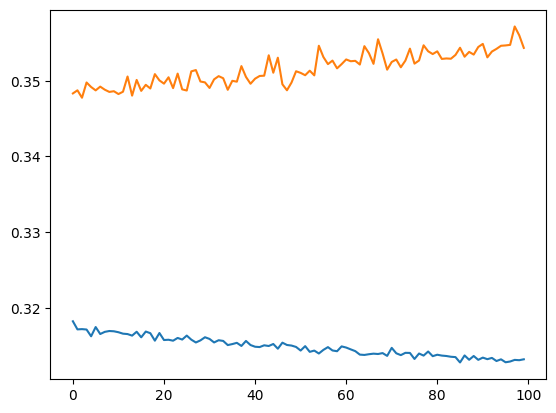

In [93]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

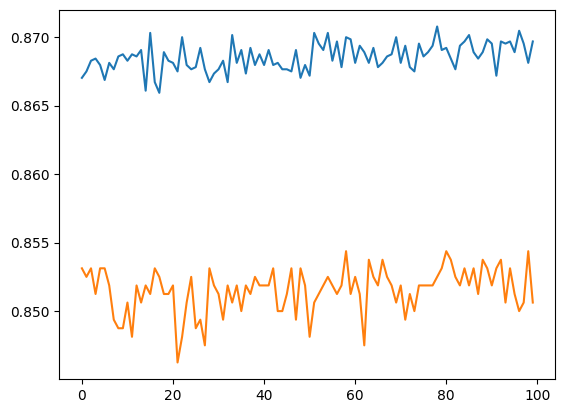

In [94]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])